# Introduction

## Background

The dataset under scrutiny encapsulates a comprehensive account of residential property sales within a US town, spanning the years 2006 to 2010. Sourced from the Assessor’s Office, this dataset is instrumental in computing assessed property values and offers valuable insights into the dynamics of the real estate market during this period.

The dataset is a compilation of various features, ranging from fundamental property attributes such as lot size and building configurations to finer details like the type of heating system or the quality of exterior materials. Each observation is a unique residential property, contributing to a mosaic of information that, when analyzed comprehensively, can unravel trends, patterns, and anomalies within the housing market.

## Objectives

The primary aim of this exploratory data analysis (EDA) is to employ Python data science methods to unravel the stories hidden within the dataset. By applying techniques learned in class and beyond, the objective is to ingest, clean, transform, and ultimately visualize the data. Rather than delving into formal modeling such as regression or machine learning, the focus of this coursework is to deeply understand and interpret the data. The step-by-step exploration will involve handling missing values, addressing duplicates, managing outliers, and providing clear visualizations to facilitate a holistic understanding of the dataset. Through this process, we aim to extract meaningful insights, identify key trends, and potentially uncover factors influencing residential property prices in the specified timeframe.


# DATA CLEANING / WRANGLING / MUNGING / TRANSFORMATION


## Import necessary libraries

In [152]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data ingestion

###Loading Dataset

In [153]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the datasets
housing_1_path = '/content/drive/MyDrive/SDCW/Housing_1.txt'
housing_2_path = '/content/drive/MyDrive/SDCW/Housing_2.txt'

housing_1 = pd.read_csv(housing_1_path, sep='\t')
housing_2 = pd.read_csv(housing_2_path, sep='\t')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
housing_1.shape

(2933, 81)

In [155]:
housing_1.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,2933.000000,2.933000e+03,2933.000000,2443.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2910.000000,...,2932.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,69.237822,10147.789976,6.094102,5.562564,1971.344016,1984.241050,102.082818,...,472.749659,93.655984,47.501534,22.988067,2.589840,16.088987,2.241050,50.583362,6.270031,2007.792704
std,846.579702,1.887213e+08,42.632965,23.354888,7876.008408,1.410595,1.111114,30.232331,20.864849,179.172166,...,214.957946,126.332461,67.457316,64.110459,25.128602,56.171408,35.579037,566.056789,3.570864,1.317834
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,731.000000,5.284770e+08,20.000000,58.000000,7441.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1464.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071811e+08,70.000000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,120.000000,2010.000000


In [156]:
housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS SubClass      2933 non-null   int64  
 3   MS Zoning        2933 non-null   object 
 4   Lot Frontage     2443 non-null   float64
 5   Lot Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2933 non-null   object 
 9   Land Contour     2933 non-null   object 
 10  Utilities        2933 non-null   object 
 11  Lot Config       2933 non-null   object 
 12  Land Slope       2933 non-null   object 
 13  Neighborhood     2933 non-null   object 
 14  Condition 1      2933 non-null   object 
 15  Condition 2      2933 non-null   object 
 16  Bldg Type        2933 non-null   object 
 17  House Style   

In [157]:
housing_2.shape

(2933, 4)

In [158]:
housing_2.describe()

,Order,PID,MS SubClass,SalePrice
count,2933.000000,2.933000e+03,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,180759.629731
std,846.579702,1.887213e+08,42.632965,79858.300395
min,1.000000,5.263011e+08,20.000000,12789.000000
25%,731.000000,5.284770e+08,20.000000,129500.000000
50%,1464.000000,5.354532e+08,50.000000,160000.000000
75%,2197.000000,9.071811e+08,70.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,755000.000000


In [159]:
housing_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Order        2933 non-null   int64
 1   PID          2933 non-null   int64
 2   MS SubClass  2933 non-null   int64
 3   SalePrice    2933 non-null   int64
dtypes: int64(4)
memory usage: 91.8 KB


###Merging Dataset

In [160]:
# Merge the DataFrames based on common columns
merged_df = pd.merge(housing_1, housing_2[['Order', 'PID', 'MS SubClass', 'SalePrice']],
                     on=['Order', 'PID', 'MS SubClass'],
                     how='left')



## Data Description
Let's start by looking at the shape of the dataset by running the following code.

In [161]:
merged_df.shape


(2939, 82)

### drop duplicate then merge

In both datasets, there are 2933 records. However, after merging, it appears that there are some duplicate values, leading to a total of 2939 records.

In [162]:
# Check for duplicate rows in housing_1
duplicate_rows_housing_1 = housing_1.duplicated(subset=['Order', 'PID', 'MS SubClass'])
print("Duplicate rows in housing_1:")
print(housing_1[duplicate_rows_housing_1])

# Check for duplicate rows in housing_2
duplicate_rows_housing_2 = housing_2.duplicated(subset=['Order', 'PID', 'MS SubClass'])
print("\nDuplicate rows in housing_2:")
print(housing_2[duplicate_rows_housing_2])


Duplicate rows in housing_1:
     Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
148    146  535175070           20        RL          73.0      9300   Pave   
149    147  535175180           20        RL          87.0     10725   Pave   
150    148  535179020           20        RL          80.0     10032   Pave   

    Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
148   NaN       Reg          Lvl  ...          143         0     NaN   NaN   
149   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
150   NaN       Reg          Lvl  ...          160         0     NaN  GdWo   

    Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  
148          NaN        0       4    2010        WD           Normal  
149          NaN        0       5    2010        WD           Normal  
150          NaN        0       6    2010        WD           Normal  

[3 rows x 81 columns]

Duplicate rows in housing_2:
    

In [163]:
# Remove duplicate rows from housing_1
housing_1_cleaned = housing_1.drop_duplicates(subset=['Order', 'PID', 'MS SubClass'])

# Merge the cleaned DataFrame with housing_2
merged_df = pd.merge(housing_1_cleaned, housing_2[['Order', 'PID', 'MS SubClass', 'SalePrice']],
                     on=['Order', 'PID', 'MS SubClass'],
                     how='left')


In [164]:
merged_df.shape

(2933, 82)

The Housing dataset has 2933 rows and 82 columns.

Now Let's look at the first few rows of the dataset to understand its structure.

In [165]:

# Display the first few rows of the dataset
merged_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


To gain a better understanding of the dataset's structure, we can perform additional exploratory steps beyond simply displaying the first few rows.

In [166]:
# Display basic information about the dataset
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2932
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS SubClass      2933 non-null   int64  
 3   MS Zoning        2933 non-null   object 
 4   Lot Frontage     2443 non-null   float64
 5   Lot Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2933 non-null   object 
 9   Land Contour     2933 non-null   object 
 10  Utilities        2933 non-null   object 
 11  Lot Config       2933 non-null   object 
 12  Land Slope       2933 non-null   object 
 13  Neighborhood     2933 non-null   object 
 14  Condition 1      2933 non-null   object 
 15  Condition 2      2933 non-null   object 
 16  Bldg Type        2933 non-null   object 
 17  House Style   

In [167]:
# Display descriptive statistics for numerical columns
merged_df.describe()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2933.000000,2.933000e+03,2933.000000,2443.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2910.000000,...,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,69.237822,10147.789976,6.094102,5.562564,1971.344016,1984.241050,102.082818,...,93.655984,47.501534,22.988067,2.589840,16.088987,2.241050,50.583362,6.270031,2007.792704,180759.629731
std,846.579702,1.887213e+08,42.632965,23.354888,7876.008408,1.410595,1.111114,30.232331,20.864849,179.172166,...,126.332461,67.457316,64.110459,25.128602,56.171408,35.579037,566.056789,3.570864,1.317834,79858.300395
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,731.000000,5.284770e+08,20.000000,58.000000,7441.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1464.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.000000,9.071811e+08,70.000000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,120.000000,2010.000000,755000.000000


## Data Cleaning and Preprocessing

In [168]:
# Calculate the count of missing values for each column in the 'merged_df' DataFrame
null_stats = pd.DataFrame(merged_df.isnull().sum(), columns=['missing_value_count'])

# Calculate the percentage of missing values relative to the total number of rows in the DataFrame
null_stats['% of dataset'] = np.round(null_stats['missing_value_count'] / merged_df.shape[0] * 100, 2)

# Display information for columns with missing values, sorted by the count of missing values in descending order
null_stats[null_stats['missing_value_count'] > 0].sort_values(by='missing_value_count', ascending=False)

,missing_value_count,% of dataset
Pool QC,2920,99.56
Misc Feature,2827,96.39
Alley,2735,93.25
Fence,2360,80.46
Fireplace Qu,1423,48.52
Lot Frontage,490,16.71
Garage Cond,159,5.42
Garage Qual,159,5.42
Garage Finish,159,5.42
Garage Yr Blt,159,5.42


###Handling Missing Values
A total of 27 columns in the dataset have missing values, with four of them—'Pool QC', 'Misc Feature', and 'Alley'—having a substantial number of null values, each accounting for less than 10% of the observations. Given the limited availability of data in these columns, dropping them is a prudent initial step to streamline the dataset and avoid potential biases introduced by imputing missing values.


In [169]:
# Dropping columns with significant missing values
missing_cols = ['Pool QC', 'Misc Feature', 'Alley']
merged_df.drop(missing_cols, axis=1, inplace=True)


In [170]:
## check after dropping columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2932
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS SubClass      2933 non-null   int64  
 3   MS Zoning        2933 non-null   object 
 4   Lot Frontage     2443 non-null   float64
 5   Lot Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Lot Shape        2933 non-null   object 
 8   Land Contour     2933 non-null   object 
 9   Utilities        2933 non-null   object 
 10  Lot Config       2933 non-null   object 
 11  Land Slope       2933 non-null   object 
 12  Neighborhood     2933 non-null   object 
 13  Condition 1      2933 non-null   object 
 14  Condition 2      2933 non-null   object 
 15  Bldg Type        2933 non-null   object 
 16  House Style      2933 non-null   object 
 17  Overall Qual  

The next column with high missing value is 'Fence', Let's look at the value of it.

In [171]:
merged_df['Fence'].value_counts()

MnPrv    330
GdPrv    118
GdWo     113
MnWw      12
Name: Fence, dtype: int64

In handling missing values, the 'Fence' column, categorized as ordinal with only 572 values present, had its missing values filled with 'NA' to indicate the absence of a fence. Subsequently, the column was transformed into a numeric representation, facilitating more effective analysis and modeling

In [172]:
# Fill missing values in 'Fence' with 'NA'
merged_df['Fence'].fillna('NA', inplace=True)

# Map the column to a numeric form
fence_mapping = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
merged_df['Fence'] = merged_df['Fence'].map(fence_mapping)


In [173]:
merged_df['Fence'].value_counts()

0    2360
3     330
4     118
2     113
1      12
Name: Fence, dtype: int64

For all other nominal columns with missing values we are going to do the same approche.

In [174]:
# Fill missing values in 'Fireplace Qu' with 'NA'
merged_df['Fireplace Qu'].fillna('NA', inplace=True)

# Map the column to a numeric form
fireplace_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
merged_df['Fireplace Qu'] = merged_df['Fireplace Qu'].map(fireplace_mapping)

# Fill missing values in 'Garage Cond' with 'NA'
merged_df['Garage Cond'].fillna('NA', inplace=True)

# Map the column to a numeric form
garage_cond_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
merged_df['Garage Cond'] = merged_df['Garage Cond'].map(garage_cond_mapping)

# Fill missing values in 'Garage Qual' with 'NA'
merged_df['Garage Qual'].fillna('NA', inplace=True)

# Map the column to a numeric form
garage_qual_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
merged_df['Garage Qual'] = merged_df['Garage Qual'].map(garage_qual_mapping)


# Fill missing values in 'Garage Finish' with 'NA'
merged_df['Garage Finish'].fillna('NA', inplace=True)

# Map the column to a numeric form
garage_finish_mapping = {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
merged_df['Garage Finish'] = merged_df['Garage Finish'].map(garage_finish_mapping)


# Fill missing values in 'Bsmt Exposure' with 'NA'
merged_df['Bsmt Exposure'].fillna('NA', inplace=True)

# Map the column to a numeric form
bsmt_exposure_mapping = {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
merged_df['Bsmt Exposure'] = merged_df['Bsmt Exposure'].map(bsmt_exposure_mapping)

# Fill missing values in 'BsmtFin Type 1' and 'BsmtFin Type 2' with 'NA'
merged_df['BsmtFin Type 1'].fillna('NA', inplace=True)
merged_df['BsmtFin Type 2'].fillna('NA', inplace=True)

# Map the columns to numeric forms
bsmtfin_type_mapping = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
merged_df['BsmtFin Type 1'] = merged_df['BsmtFin Type 1'].map(bsmtfin_type_mapping)
merged_df['BsmtFin Type 2'] = merged_df['BsmtFin Type 2'].map(bsmtfin_type_mapping)

# Fill missing values in 'Bsmt Qual' with 'NA'
merged_df['Bsmt Qual'].fillna('NA', inplace=True)

# Map the column to a numeric form
bsmt_qual_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
merged_df['Bsmt Qual'] = merged_df['Bsmt Qual'].map(bsmt_qual_mapping)

# Fill missing values in 'Bsmt Cond' with 'NA'
merged_df['Bsmt Cond'].fillna('NA', inplace=True)

# Map the column to a numeric form
bsmt_cond_mapping = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
merged_df['Bsmt Cond'] = merged_df['Bsmt Cond'].map(bsmt_cond_mapping)


###Fixing missing values in nominal columns
Next, we inspect missing values for nominal column Garage Type:

In [175]:
# Display counts of unique values in 'Garage Type'
print(merged_df['Garage Type'].value_counts(dropna=False))
print('\n')

# Display counts of unique values in 'Garage Area' for rows where 'Garage Type' is null
print(merged_df.loc[merged_df['Garage Type'].isnull(), 'Garage Type'].value_counts(dropna=False))


Attchd     1734
Detchd      782
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64


NaN    157
Name: Garage Type, dtype: int64


The dataset initially showed 157 missing values in the "Garage Type" column. However, upon consulting the data dictionary, it was discovered that "NA" in this context denotes "No Garage." To clarify, we cross-referenced these missing values with corresponding "Garage Area" values. A count revealed that instances with "Garage Type" as "NA" perfectly align with "Garage Area" values of 0.00. This indicates that these 157 entries are intentional and represent properties with no garage.
For improved clarity and to accurately represent properties without a garage, we replace NaN values in the "Garage Type" column with "NoGrg," aligning with the data dictionary's indication that "NA" stands for "No Garage." Notably, this approach acknowledges that these entries are not actually null values but rather signify the absence of a garage.

In [176]:
# Replace NaN values in 'Garage Type' with 'NoGrg'
merged_df['Garage Type'].fillna('NoGrg', inplace=True)


In [177]:
# Display counts of unique values in 'Garage Type' after replacement
print(merged_df['Garage Type'].value_counts(dropna=False))
print('\n')

Attchd     1734
Detchd      782
BuiltIn     186
NoGrg       157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64




In [178]:
# Check unique values in 'Mas Vnr Type' column and investigate associated NaN values in 'Mas Vnr Area'
print(merged_df['Mas Vnr Type'].value_counts(dropna=False))
print('\n')
print(merged_df.loc[merged_df['Mas Vnr Type'].isnull(), 'Mas Vnr Area'].value_counts(dropna=False))


None       1752
BrkFace     882
Stone       250
BrkCmn       25
NaN          23
CBlock        1
Name: Mas Vnr Type, dtype: int64


NaN    23
Name: Mas Vnr Area, dtype: int64


In the 'Mas Vnr Type' column, we found 23 NaN values. Checking the 'Mas Vnr Area' column, we discovered the same count of NaN values, all associated with 'Mas Vnr Type' labeled as 'None.' Therefore, we considered these NaN values in 'Mas Vnr Type' as representing 'None' and replaced them accordingly for consistency.

In [179]:
# Fill missing values in 'Mas Vnr Type' with 'None' based on 'Mas Vnr Area' as a reference
# There are 23 missing values in both columns, indicating 'None' for Mas Vnr Type corresponds to missing data
merged_df['Mas Vnr Type'] = merged_df['Mas Vnr Type'].fillna('None')
print(merged_df['Mas Vnr Type'].value_counts(dropna=False))



None       1775
BrkFace     882
Stone       250
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64


In [180]:
# Checking the correlation between 'Lot Frontage' and 'Lot Area' to explore potential imputation strategies for missing values
merged_df[['Lot Frontage', 'Lot Area']].corr()


,Lot Frontage,Lot Area
Lot Frontage,1.000000,0.491282
Lot Area,0.491282,1.000000


The correlation coefficient between 'Lot Frontage' and 'Lot Area' is 0.491282, indicating a moderate positive correlation. However, the correlation is not strong enough to reliably predict 'Lot Frontage' based on 'Lot Area.' As a result, missing values in the 'Lot Frontage' column are filled with the mean value, as it provides a general estimate without relying heavily on the specific 'Lot Area' values. This approach ensures a reasonable imputation method given the limited predictive power of the correlation.

In [181]:
# Calculate the mean of 'Lot Frontage' and fill missing values with the rounded mean
lot_frontage_mean = np.round(merged_df['Lot Frontage'].mean(), 0)
print(f'Lot Frontage mean: {lot_frontage_mean}')
merged_df['Lot Frontage'].fillna(lot_frontage_mean, inplace=True)


Lot Frontage mean: 69.0


####Mapping Numeric Values in Ordinal Columns:
During the data processing phase, 12 ordinal columns required mapping, as they were not addressed in the missing values patching. The following 10 ordinal columns were mapped to numeric values:


1.   'Lot Shape': Mapped {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
2.   'Utilities': Mapped {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
3.   'Land Slope': Mapped {'Sev': 0, 'Mod': 1, 'Gtl': 2}
4.   'Exter Qual': Mapped {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
5.   'Exter Cond': Mapped {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
6.   'Heating QC': Mapped {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
7.   'Exter Qual': Mapped {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
8.   'Electrical': Mapped {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4}
9.   'Functional': Mapped {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
10.   'Paved Drive': Mapped {'N': 0, 'P': 1, 'Y': 2}
This process ensures that these ordinal columns are represented with numeric values for further analysis or machine learning models

















In [182]:
# Mapping for each specified ordinal column in the dataset

lot_shape_mapping = {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
merged_df['Lot Shape'].replace(lot_shape_mapping, inplace=True)

utilities_mapping = {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
merged_df['Utilities'].replace(utilities_mapping, inplace=True)

land_slope_mapping = {'Sev': 0, 'Mod': 1, 'Gtl': 2}
merged_df['Land Slope'].replace(land_slope_mapping, inplace=True)

exter_qual_mapping = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
merged_df['Exter Qual'].replace(exter_qual_mapping, inplace=True)

exter_cond_mapping = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
merged_df['Exter Cond'].replace(exter_cond_mapping, inplace=True)

heating_qc_mapping = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
merged_df['Heating QC'].replace(heating_qc_mapping, inplace=True)

electrical_mapping = {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4}
merged_df['Electrical'].replace(electrical_mapping, inplace=True)

kitchen_qual_mapping = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
merged_df['Kitchen Qual'].replace(kitchen_qual_mapping, inplace=True)

functional_mapping = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
merged_df['Functional'].replace(functional_mapping, inplace=True)

paved_drive_mapping = {'N': 0, 'P': 1, 'Y': 2}
merged_df['Paved Drive'].replace(paved_drive_mapping, inplace=True)



##Duplicate

In [183]:
# Check for duplicate values in the 'PID' column
duplicate_pid = merged_df['PID'].duplicated()

# Display rows with duplicate 'PID' values
duplicates_df = merged_df[duplicate_pid]
duplicates_df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
146,146,535175070,20,RL,73.0,9300,Pave,3,Lvl,3,...,0,143,0,0,0,4,2010,WD,Normal,167500
148,147,535175180,20,RL,87.0,10725,Pave,2,Lvl,3,...,0,0,0,0,0,5,2010,WD,Normal,108538
150,148,535179020,20,RL,80.0,10032,Pave,3,Lvl,3,...,0,160,0,2,0,6,2010,WD,Normal,159500


In [184]:
# Display rows with PID equal to 535175180 in the merged DataFrame
rows_with_pid_535175180 = merged_df[merged_df['PID'] == 535175180]
print(rows_with_pid_535175180)


     Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
147    147  535175180           20        RL          87.0     10725   Pave   
148    147  535175180           20        RL          87.0     10725   Pave   

     Lot Shape Land Contour  Utilities  ... 3Ssn Porch  Screen Porch  \
147          2          Lvl          3  ...          0             0   
148          2          Lvl          3  ...          0             0   

    Pool Area Fence Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
147         0     0        0       5    2010        WD           Normal   
148         0     0        0       5    2010        WD           Normal   

     SalePrice  
147     108538  
148     108538  

[2 rows x 79 columns]


In [185]:
# Handle duplicates
# Remove duplicate rows based on the 'PID' column
merged_df = merged_df.drop_duplicates(subset='PID', keep='first')


In [186]:
# Check for duplicate values in the 'PID' column
duplicate_pid = merged_df['PID'].duplicated()

# Display rows with duplicate 'PID' values
duplicates_df = merged_df[duplicate_pid]
duplicates_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


#Outlier

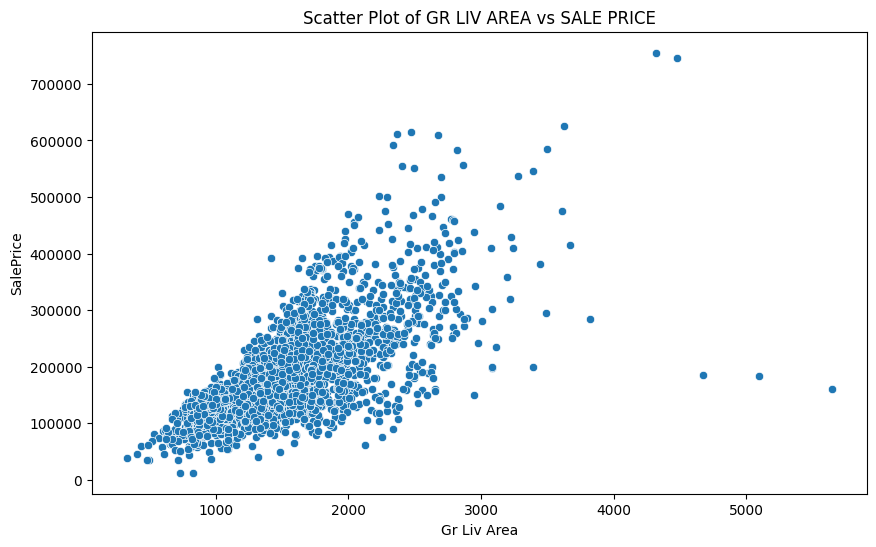

In [187]:


# Create a scatter plot using Seaborn, plotting 'Gr Liv Area' against 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Gr Liv Area'], y=merged_df['SalePrice'])

# Set the title, x-axis label, and y-axis label for the scatter plot
plt.title('Scatter Plot of GR LIV AREA vs SALE PRICE')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')

# Show the scatter plot
plt.show()



In the course of our analysis, we identified five outliers in the 'Gr Liv Area' feature, indicating houses with unusually large living spaces. Outliers can significantly impact the results of statistical analyses and machine learning models, potentially leading to skewed conclusions. To ensure the robustness of our analysis and to focus on the general patterns within the dataset, we made the decision to exclude houses with more than 4000 square feet of living area. This approach helps prevent the disproportionate influence of extreme values, providing a more accurate representation of the relationships between features and sale prices in the majority of cases. Removing outliers is a common practice to enhance the reliability and interpretability of exploratory data analysis and modeling efforts.

In [188]:
# Assuming 'GR LIV AREA' is the correct column name
merged_df = merged_df[merged_df['Gr Liv Area'] <= 4000]

# Now, you have removed houses with more than 4000 square feet


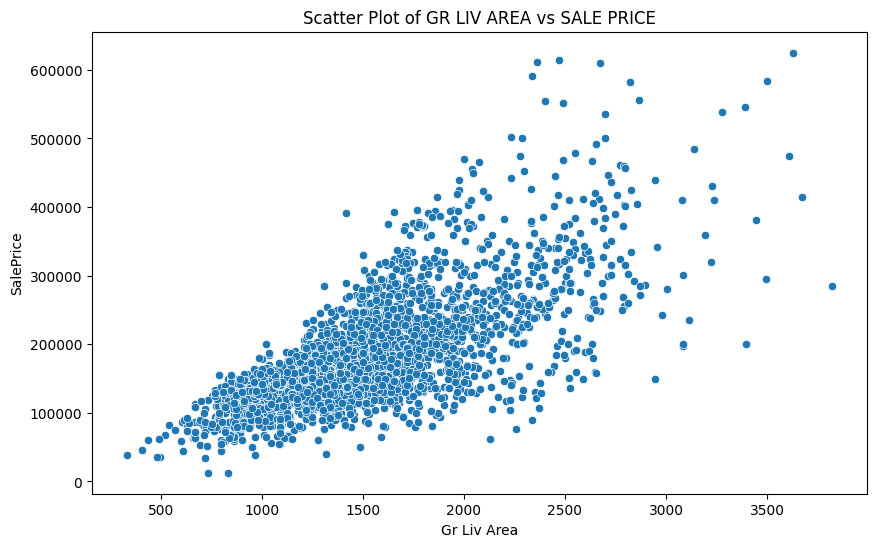

In [189]:
# Create a scatter plot using Seaborn, plotting 'Gr Liv Area' against 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Gr Liv Area'], y=merged_df['SalePrice'])

# Set the title, x-axis label, and y-axis label for the scatter plot
plt.title('Scatter Plot of GR LIV AREA vs SALE PRICE')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')

# Show the scatter plot
plt.show()

#Exploratory Data Analysis (EDA)

##Descriptive Statistics

In [190]:
# 'SalePrice' statistics as a key variable
sale_price_stats = merged_df['SalePrice'].describe()
print(sale_price_stats)

count      2925.000000
mean     180411.574701
std       78554.857286
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      625000.000000
Name: SalePrice, dtype: float64


In the exploration of the 'SalePrice' variable, which serves as a key indicator in our dataset, the following summary statistics shed light on the distribution and characteristics of housing sale prices:
Count: There are 2925 non-null observations, representing houses with available sale price information.
Mean (Average Sale Price): The mean sale price is approximately 180,411.57, serving  as a central point around which sale prices tend to cluster.
Standard Deviation (Variability): With a standard deviation of about 78,554.86, the variability in sale prices is measured, indicating the extent of dispersion.
Minimum and Maximum Sale Prices: The minimum observed sale price is 12,789, while the maximum is 625,000, delineating the range of prices in our dataset.
Quartiles (25th, 50th, and 75th Percentiles): The 25th percentile (Q1) is 129,500, denoting that a quarter of the houses have sale prices below this value. Similarly, the 75th percentile (Q3) is $213,500, indicating that three-quarters of the houses have sale prices below this threshold.
These statistics provide a comprehensive understanding of the distribution of sale prices, offering insights into central tendencies, variability, and the overall range of observed prices in our dataset.

## Data Visualisation

### Univariate Analysis


#### Data Distribution

#####Distribution of Sale Price

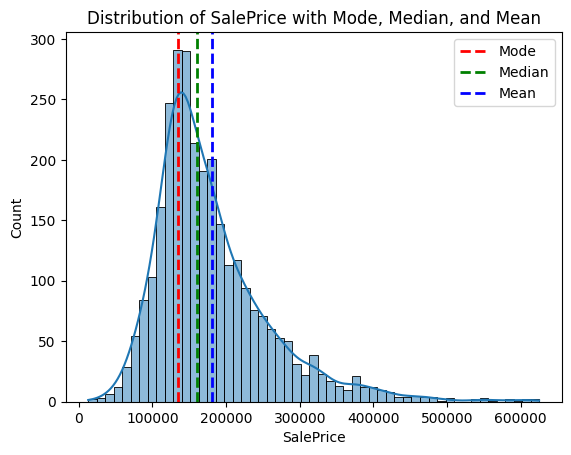

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'SalePrice' is a key variable
sale_price_data = merged_df['SalePrice']

# Calculate mode, median, and mean
mode_value = sale_price_data.mode().values[0]
median_value = sale_price_data.median()
mean_value = sale_price_data.mean()

# Plot the histogram
sns.histplot(sale_price_data, kde=True)

# Add vertical lines for mode, median, and mean
plt.axvline(mode_value, color='red', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label='Mean')

# Set plot title and legend
plt.title('Distribution of SalePrice with Mode, Median, and Mean')
plt.legend()

# Show the plot
plt.show()


#####Distribution of other continuos variables

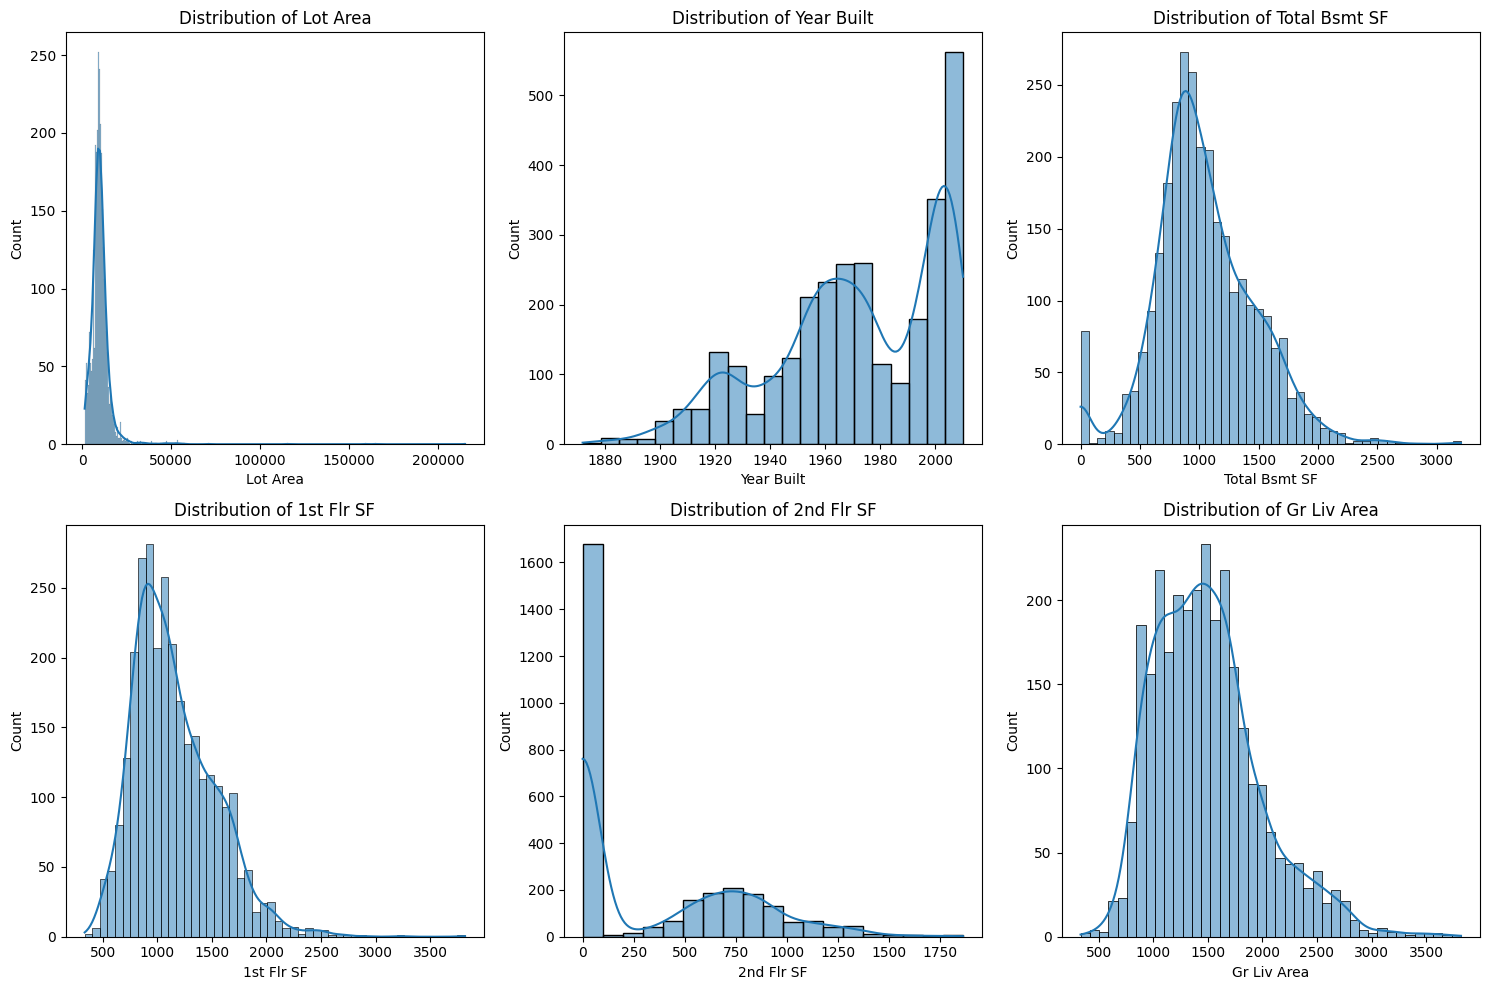

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = [ 'Lot Area', 'Year Built',
                   'Total Bsmt SF', '1st Flr SF',
                   '2nd Flr SF', 'Gr Liv Area']

# Number of columns for subplots
num_cols = 3
# Number of rows needed to display all plots
num_rows = (len(continuous_vars) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each continuous variable
for i, var in enumerate(continuous_vars):
    sns.histplot(merged_df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Adjust layout
plt.tight_layout()
plt.show()



The histograms offer valuable insights into the distribution of key continuous variables, shedding light on the dataset's characteristics:

**Lot Area**

Skew Right (Shape): The right-skewed distribution indicates that a majority of houses have smaller lot sizes, with a tail extending towards significantly larger lots. This shape implies that while most properties have relatively modest areas, there are notable exceptions with extensive land.

**Year Built**

Multimodal (Shape): The multimodal distribution reveals distinct peaks, suggesting periods during which a substantial number of houses were constructed. This shape provides insights into historical trends in construction, highlighting phases of increased or decreased building activity.

**Total Bsmt SF**

Symmetric, Unimodal (Shape): The symmetric, unimodal distribution indicates a balanced range of total basement square footage across houses. The central peak represents the most common values, and the symmetry suggests an even distribution around the mean.

**1st Flr SF**

Symmetric, Unimodal (Shape): Similar to Total Bsmt SF, the symmetric, unimodal distribution for 1st Flr SF signifies a balanced range of first-floor square footage. The symmetry and unimodal nature indicate a relatively even distribution without distinct peaks or clusters.

**2nd Flr SF**

Outliers and Bimodal (Shape): The presence of outliers and a bimodal shape suggests two distinct groups of houses. The outliers may represent properties with exceptionally large second-floor areas, while the bimodal shape indicates the existence of two predominant clusters, possibly houses with and without significant second-floor space.

**Understanding the Range**

Analyzing the range of each variable provides information about the spread of values. For example, in Lot Area, the range reveals how widely the sizes of lots vary. In Total Bsmt SF and 1st Flr SF, examining the range helps us understand the diversity in basement and first-floor sizes.

Understanding these distributions helps identify patterns, outliers, and dataset characteristics. Analyzing important continuous variables aids in uncovering trends that may impact the target variable ('SalePrice') and guides further exploration or feature engineering.

##### Distribution of nominal variables

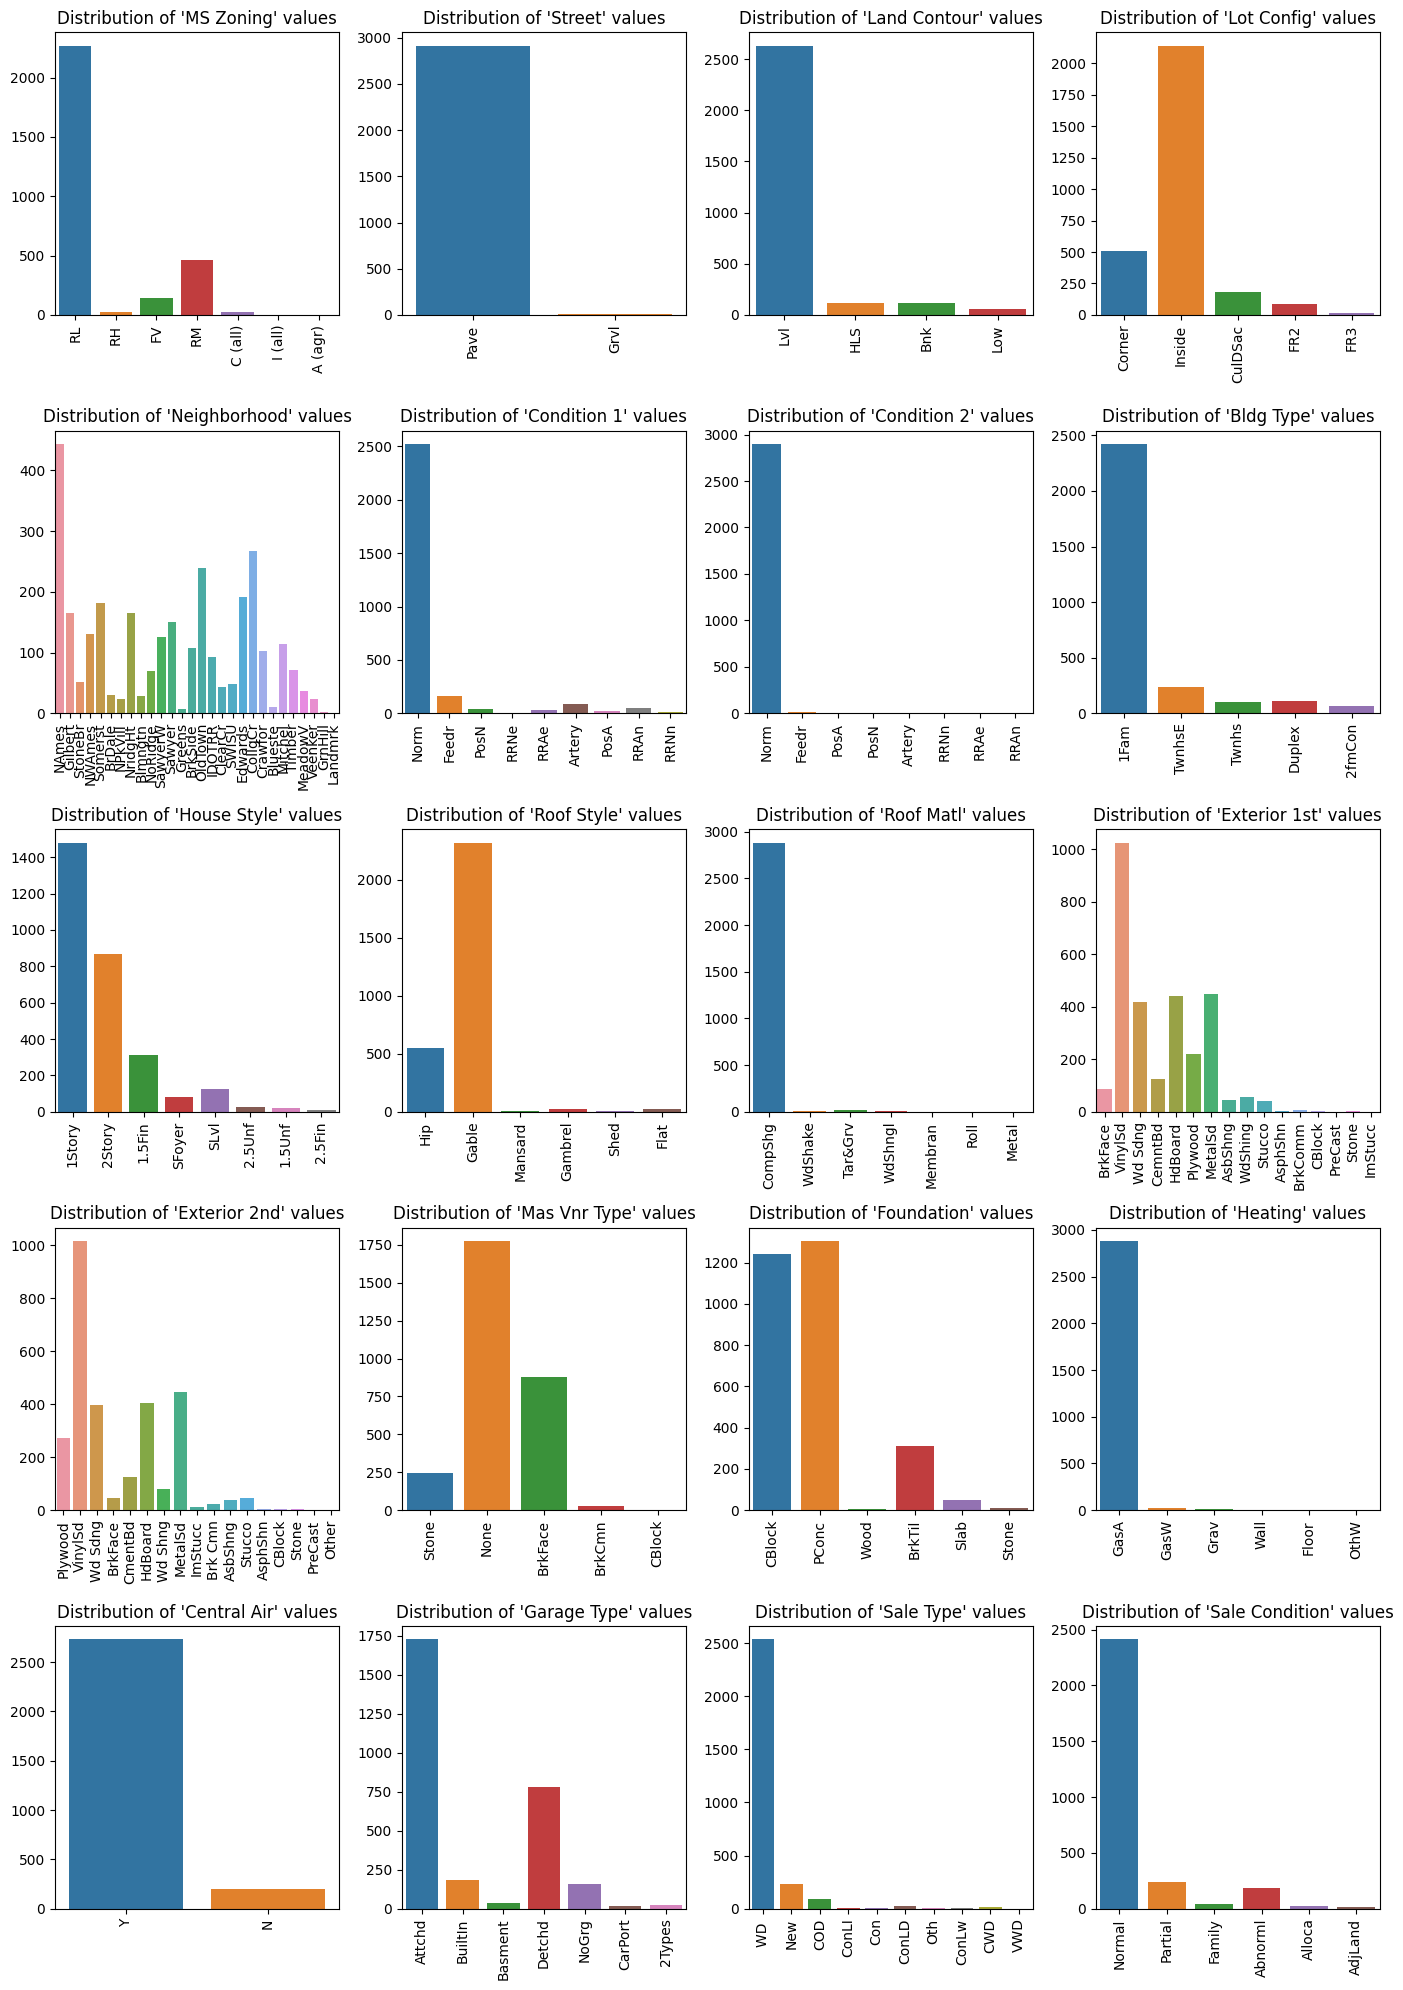

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define nominal columns in your dataset
nominal_columns = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood',
                   'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
                   'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
                   'Heating', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition']

# Plot the distribution of values within each nominal column
nrows = int(np.ceil(len(nominal_columns) / 4))
ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
ax = ax.ravel()

for i, column in enumerate(nominal_columns):
    sns.countplot(data=merged_df, x=column, ax=ax[i])
    ax[i].set_title(f'Distribution of \'{column}\' values', fontsize=12)
    plt.setp(ax[i].get_xticklabels(), rotation=90, fontsize=10)  # smaller font for x-tick
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")

if len(nominal_columns) < nrows * ncols:
    for i in range(nrows * ncols - len(nominal_columns)):
        ax[nrows * ncols - 1 - i].set_axis_off()  # get rid of empty subplots if they are present

fig.tight_layout()
plt.show()



The distribution of nominal variables in the dataset reveals varying degrees of uniqueness and prevalence among different columns. For instance, some nominal columns, such as 'Street' and 'Central Air,' exhibit a binary distribution with only two distinct values. On the other hand, more complex nominal columns like 'Neighborhood' present a richer variety, encompassing 28 different possible values.

In these visualizations, it becomes evident that certain nominal columns display a pronounced skew towards one specific value, indicating a substantial imbalance in the distribution. This skewness is particularly noticeable when the majority of instances fall into one category, rendering other nominal values relatively negligible in comparison.

Understanding the distribution of nominal variables is crucial for uncovering patterns and imbalances within categorical features, which can influence subsequent analyses or modeling decisions. Adjustments or encoding techniques may be considered based on these insights.

### Bivariate Analysis

##### Continuous Variables Vs. Sale Price


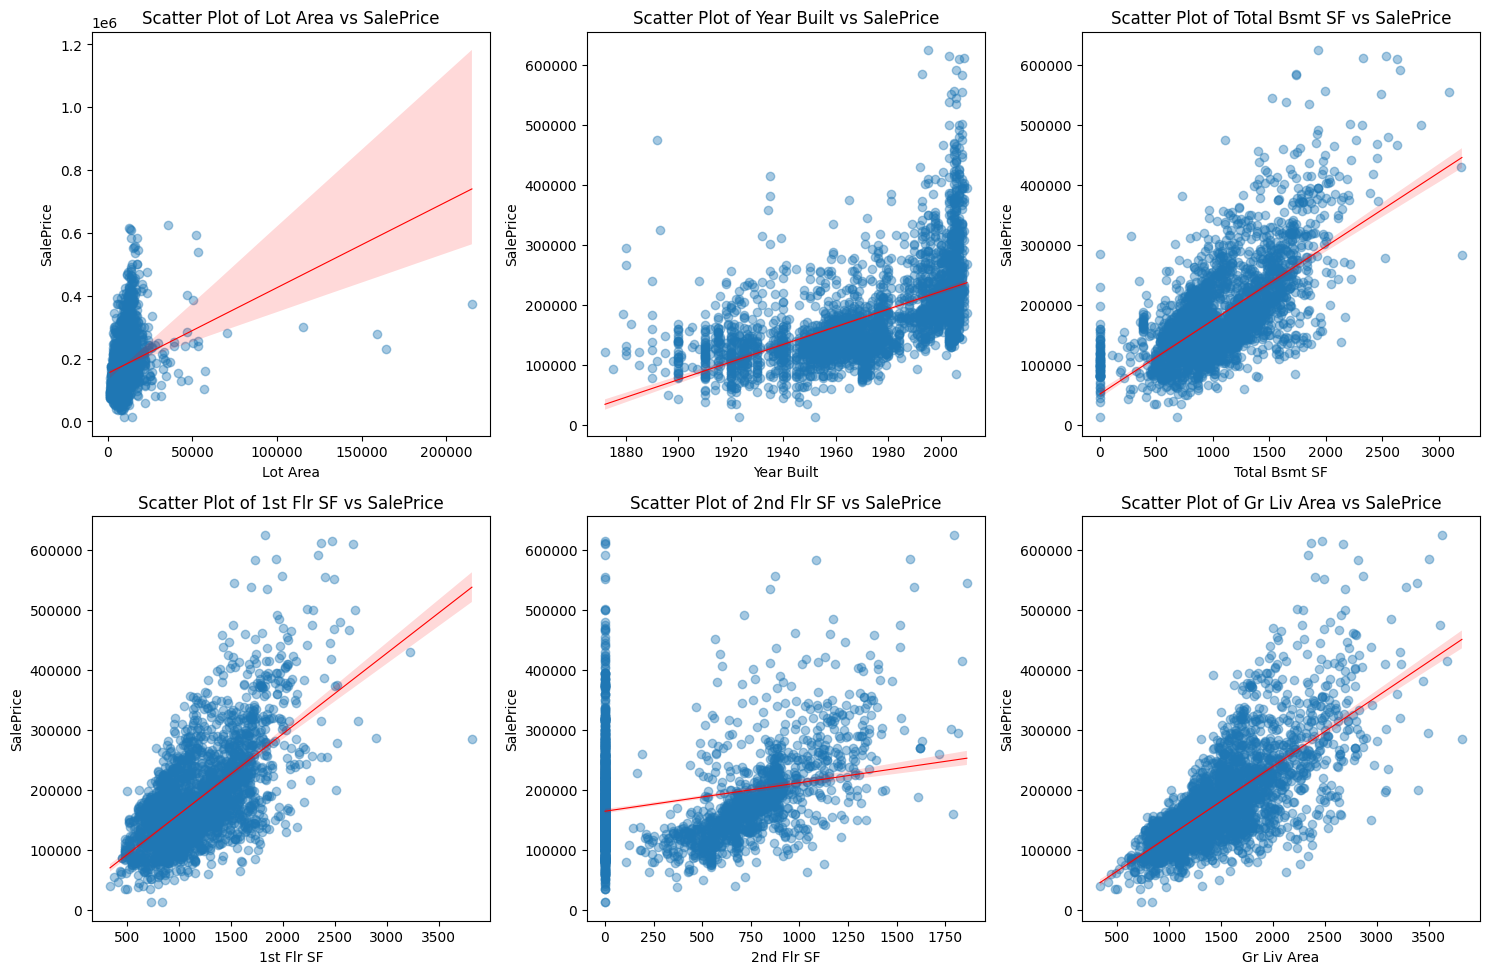

In [194]:
# List of continuous variables
continuous_vars = ['Lot Area', 'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area']

# Number of columns for subplots
num_cols = 3
# Number of rows needed to display all plots
num_rows = (len(continuous_vars) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each continuous variable against 'SalePrice'
for i, var in enumerate(continuous_vars):
    sns.regplot(x=merged_df[var], y=merged_df['SalePrice'], ax=axes[i], scatter_kws={'alpha': 0.4}, line_kws={'color': 'red', 'linewidth': 0.8})
    axes[i].set_title(f'Scatter Plot of {var} vs SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()







One of the crucial factors influencing property prices is its size. The dataset offers various size metrics for different property segments, such as porch, 1st floor, and basement. A particularly reliable metric for understanding overall property size is 'Gr Liv Area,' representing the general living space.

We observe a notable upward trend between 'Gr Liv Area' and 'SalePrice,' indicating that sale prices tend to increase with the size of the living space. The majority of property living spaces fall within the range of 750 to 2,000 square feet. Additionally, a significant portion of sale prices clusters between 75,000 to 200,000.

Extending the analysis to other continuous variables, we find that, except for  most continuous variables exhibit a positive relationship with 'SalePrice.' This trend is consistent with the area-centric nature of these variables, where sale prices generally increase alongside larger areas.

##### Nominal Variables Vs. Sale Price


In the realm of real estate, property values hinge not only on size but also on location and zoning classification. The 'Neighborhood' and 'MS Zoning' columns provide key insights into a property's locality and zoning category, respectively. To understand how these factors relate to sale prices, we'll employ box plots, offering a concise visual representation of price distributions across different neighborhoods and zoning classifications. This analysis aims to uncover patterns and variations, unveiling the impact of location and zoning on property values.

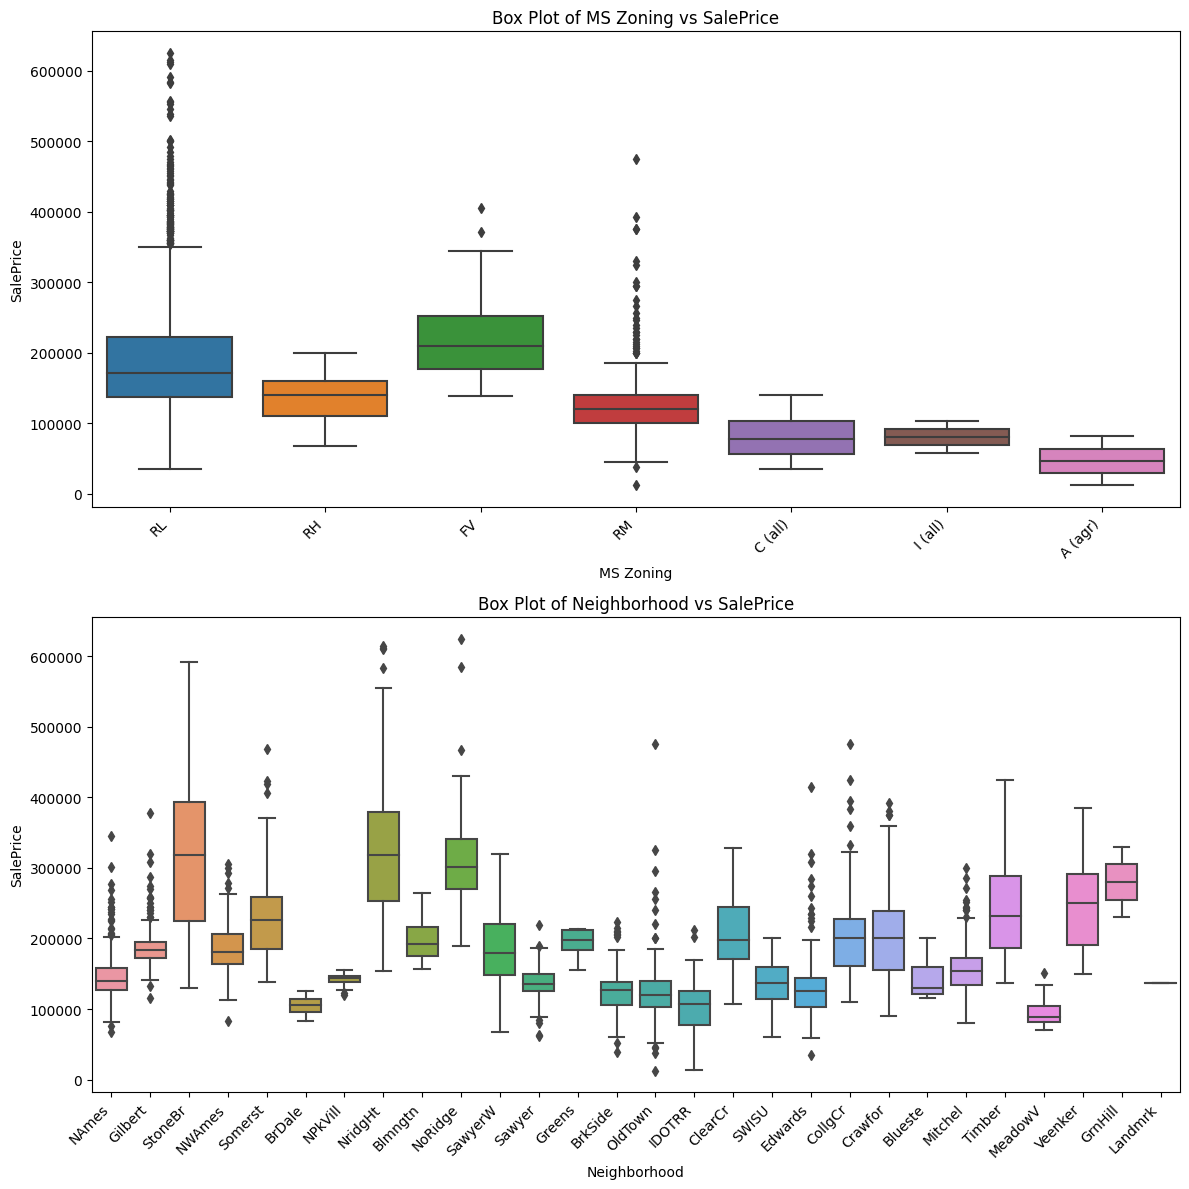

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of important nominal variables
nominal_vars = ['MS Zoning', 'Neighborhood']

# Create subplots
fig, axes = plt.subplots(len(nominal_vars), 1, figsize=(12, 6 * len(nominal_vars)))

# Plot box plots for each nominal variable against 'SalePrice'
for i, var in enumerate(nominal_vars):
    sns.boxplot(x=merged_df[var], y=merged_df['SalePrice'], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var} vs SalePrice')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout
plt.tight_layout()
plt.show()


The boxplot analysis reveals intriguing insights into the relationship between sale prices and neighborhood or zoning classification. For neighborhoods like StoneBr and NridgHt, similar characteristics result in comparable median prices without significant overlap in their interquartile ranges. On the other hand, neighborhoods like StoneBr and Mitchel exhibit distinct features, leading to non-intersecting interquartile ranges on the sale price scale.

Examining SalePrice by MS Zoning sheds light on distinct median price trends. Properties in the Floating Village Residential zone stand out with a median price exceeding 200,000, hinting at potentially scenic waterfront locations. In contrast, commercial, industrial, and agricultural zones command median prices ranging from 50,000 to 75,000, emphasizing the influence of zoning on property values. This analysis underscores the impact of neighborhood and zoning factors on sale prices, providing valuable insights for real estate considerations.

<ipython-input-196-89027ceb5b8a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_with_ref_to_saleprice = merged_df.corr().loc[:,'SalePrice']


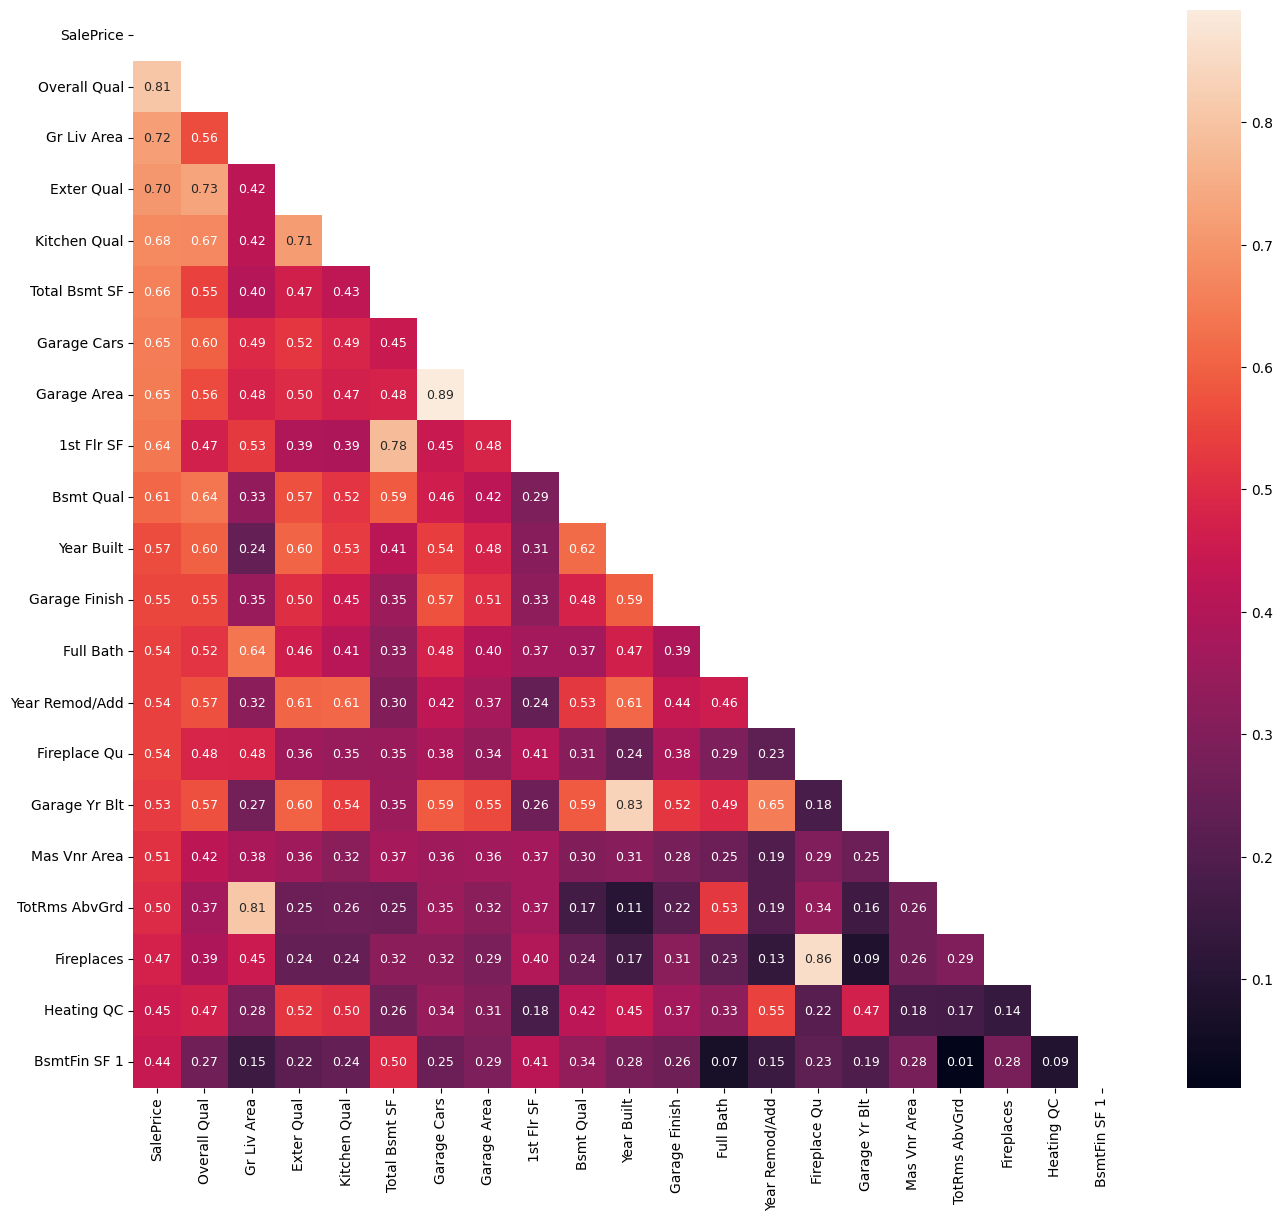

In [196]:
# Calculate correlations of each feature with SalePrice
correlations_with_ref_to_saleprice = merged_df.corr().loc[:,'SalePrice']

# Select the top 20 features with the highest absolute correlations
top_correlations = correlations_with_ref_to_saleprice.abs().sort_values(ascending=False).head(21)

# Create a correlation matrix for the selected features
top_correlations = merged_df.loc[:, list(top_correlations.index)].corr()

# Create a mask to hide the upper triangular part of the heatmap
mask = np.zeros_like(top_correlations)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(top_correlations, annot=True, annot_kws={"size": 9}, fmt='.2f', mask=mask)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()


The provided correlation coefficients represent the top 20 features in terms of their correlation with the target variable, SalePrice. Here's an interpretation based on these correlations:

**Overall Quality (Overall Qual):** The overall quality of the property has a strong positive correlation (0.81) with its sale price. This is expected, as higher-quality properties tend to command higher prices.

**Above Ground Living Area (Gr Liv Area):** The size of the above-ground living area is also strongly positively correlated (0.72) with the sale price. Larger living spaces generally lead to higher property values.

**Exterior Quality (Exter Qual):** The quality of the exterior material has a strong positive correlation (0.70) with the sale price. Properties with high-quality exteriors often have higher prices.

**Kitchen Quality (Kitchen Qual):** Similar to exterior quality, the quality of the kitchen has a positive correlation (0.68) with the sale price. Upgraded kitchens can contribute to higher property values.

**Total Basement Area (Total Bsmt SF):** The size of the total basement area is positively correlated (0.66) with the sale price. Larger basements are associated with higher property prices.

**Number of Cars in Garage (Garage Cars):** The capacity of the garage in terms of the number of cars it can accommodate shows a positive correlation (0.65) with sale price. Larger garages can be a desirable feature.

**Garage Area:** Similar to garage capacity, the total area of the garage is positively correlated (0.65) with the sale price.

**First Floor Square Footage (1st Flr SF):** The size of the first floor shows a positive correlation (0.64) with the sale price. Larger first floors are associated with higher property values.

**Basement Quality (Bsmt Qual):** The quality of the basement exhibits a positive correlation (0.61) with the sale price. Higher-quality basements are linked to higher property prices.

**Year Built:** The year the property was built is positively correlated (0.57) with the sale price. In some cases, older homes may have historical or architectural significance, contributing to higher prices.

These correlations provide valuable insights into the features that significantly influence the sale price of properties. It emphasizes the importance of factors such as quality, size, and specific amenities in determining property values.

# Results and Discussion


## Key Findings

The analysis of the housing dataset has yielded key insights into the factors influencing property sale prices. Notably, strong correlations were identified between sale prices and features such as "Overall Quality," "Above Ground Living Area," "Exterior Quality," and "Kitchen Quality," emphasizing the pivotal role of property quality and size in determining market values. Additionally, size-related attributes, including "Total Basement Area," "First Floor Square Footage," and "Garage Area," consistently exhibited positive correlations, indicating that larger living spaces, basements, and garages are associated with higher property values.

Furthermore, the influence of temporal and locational aspects became evident through the positive correlation observed between "Year Built" and sale prices. The analysis extended to explore neighborhood and zoning classifications through box plot analyses, revealing intriguing insights into the distinct characteristics of different locales and zoning categories. These variations in median prices underscore the impact of neighborhood attributes and zoning regulations on property values, providing valuable context for understanding the broader real estate landscape.


## Interpretation


The results underscore the significance of quality, size, and specific property features in influencing the real estate market. Homebuyers and sellers should consider these factors when assessing property values. The findings also highlight the importance of investing in property improvements, especially in areas related to overall quality and living space. Moreover, the neighborhood and zoning analyses emphasize the need to account for the locality and zoning classification's impact on property prices.